In [1]:
import numpy as np
import pandas as pd


In [2]:
import pandas as pd


encodings = ['utf-8', 'latin1', 'utf-16']
for encoding in encodings:
    try:
        df = pd.read_csv('email_text.csv', encoding=encoding)
        break
    except UnicodeDecodeError:
        pass


the basic dataframe line kept giving errors so, tried this code segment after google research which worked. 

In [3]:
df.sample(5)


,label,text
16735,0,> Date: Tue May escapenumber escapenumber:esca...
46042,1,Paradise is here! Our casino paradise is lined...
12546,1,Anatrim =escapenumber The very up-to-date and ...
5701,1,This one is hardly promoted Special Situation ...
40876,0,Hart said: the IBM TTS which sounds like eliqu...


In [4]:
df.shape

(53998, 2)

#  1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53998 entries, 0 to 53997
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   53998 non-null  int64 
 1   text    53998 non-null  object
dtypes: int64(1), object(1)
memory usage: 843.8+ KB


Drop the unnecessary columns

Renaming the cols

In [6]:
df.rename(columns={'label':'prediction','text':'text'},inplace=True)

In [7]:
df.sample(5)

,prediction,text
6855,0,Dear all as usual I am again lost in virtues o...
21420,0,"Thursday, May escapenumber, escapenumber Watch..."
52444,0,In message <escapenumberAescapenumberEescapenu...
7993,1,Does Size Matter? ---- escapenumber% of WOMEN ...
28480,0,"""Wesley J. Landaker"" writes: > On Tuesday esca..."


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['prediction'] = encoder.fit_transform(df['prediction'])
df.head()

,prediction,text
0,1,Do you feel the pressure to perform and not ri...
1,0,"Hi, i've just updated from the gulus and I che..."
2,1,Mega authenticV I A G R A $ DISCOUNT priceC I ...
3,1,"Hey Billy, it was really fun going out the oth..."
4,1,"system"" of the home. It will have the capabili..."


Missing value check

In [9]:
df.isnull().sum()

prediction    0
text          0
dtype: int64

Duplicate value check

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(53998, 2)

## 2. EDA

In [12]:
df.head()

,prediction,text
0,1,Do you feel the pressure to perform and not ri...
1,0,"Hi, i've just updated from the gulus and I che..."
2,1,Mega authenticV I A G R A $ DISCOUNT priceC I ...
3,1,"Hey Billy, it was really fun going out the oth..."
4,1,"system"" of the home. It will have the capabili..."


In [13]:
df['prediction'].value_counts()

prediction
1    30233
0    23765
Name: count, dtype: int64

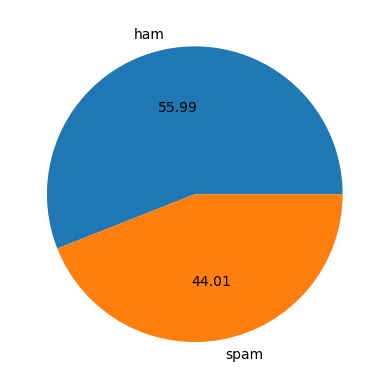

In [14]:
import matplotlib.pyplot as plt
plt.pie(df['prediction'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [15]:
import nltk


In [16]:
!pip install nltk

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dynamic_Computer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
df['characters'] = df['text'].apply(len)

In [20]:
df.head()

,prediction,text,characters
0,1,Do you feel the pressure to perform and not ri...,168
1,0,"Hi, i've just updated from the gulus and I che...",741
2,1,Mega authenticV I A G R A $ DISCOUNT priceC I ...,124
3,1,"Hey Billy, it was really fun going out the oth...",672
4,1,"system"" of the home. It will have the capabili...",2545


In [21]:

df['words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [22]:
df.head()

,prediction,text,characters,words
0,1,Do you feel the pressure to perform and not ri...,168,40
1,0,"Hi, i've just updated from the gulus and I che...",741,116
2,1,Mega authenticV I A G R A $ DISCOUNT priceC I ...,124,28
3,1,"Hey Billy, it was really fun going out the oth...",672,144
4,1,"system"" of the home. It will have the capabili...",2545,498


In [23]:
df['sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
df.head()

,prediction,text,characters,words,sentences
0,1,Do you feel the pressure to perform and not ri...,168,40,2
1,0,"Hi, i've just updated from the gulus and I che...",741,116,8
2,1,Mega authenticV I A G R A $ DISCOUNT priceC I ...,124,28,2
3,1,"Hey Billy, it was really fun going out the oth...",672,144,3
4,1,"system"" of the home. It will have the capabili...",2545,498,29


In [80]:
df[['characters','words','sentences']].describe()

,characters,words,sentences
count,53998.000000,53998.000000,53998.000000
mean,1936.290937,332.308326,11.223064
std,4676.027918,825.105315,18.034016
min,1.000000,1.000000,1.000000
25%,575.000000,97.000000,4.000000
50%,1078.000000,180.000000,7.000000
75%,2184.000000,362.000000,13.000000
max,677811.000000,118794.000000,817.000000


In [81]:
# ham
df[df['prediction'] == 0][['characters','words','sentences']].describe()

,characters,words,sentences
count,23765.000000,23765.000000,23765.000000
mean,2737.111719,478.857395,13.466779
std,6520.306668,1162.750222,22.852239
min,6.000000,1.000000,1.000000
25%,889.000000,153.000000,5.000000
50%,1510.000000,263.000000,8.000000
75%,2813.000000,491.000000,14.000000
max,677811.000000,118794.000000,588.000000


In [82]:
#spam
df[df['prediction'] == 1][['characters','words','sentences']].describe()

,characters,words,sentences
count,30233.000000,30233.000000,30233.000000
mean,1306.796481,217.111732,9.459366
std,2175.818957,350.822915,12.779529
min,1.000000,1.000000,1.000000
25%,421.000000,67.000000,3.000000
50%,773.000000,134.000000,6.000000
75%,1680.000000,281.000000,12.000000
max,146276.000000,26616.000000,817.000000


In [50]:
import seaborn as sns

<Axes: xlabel='characters', ylabel='Count'>

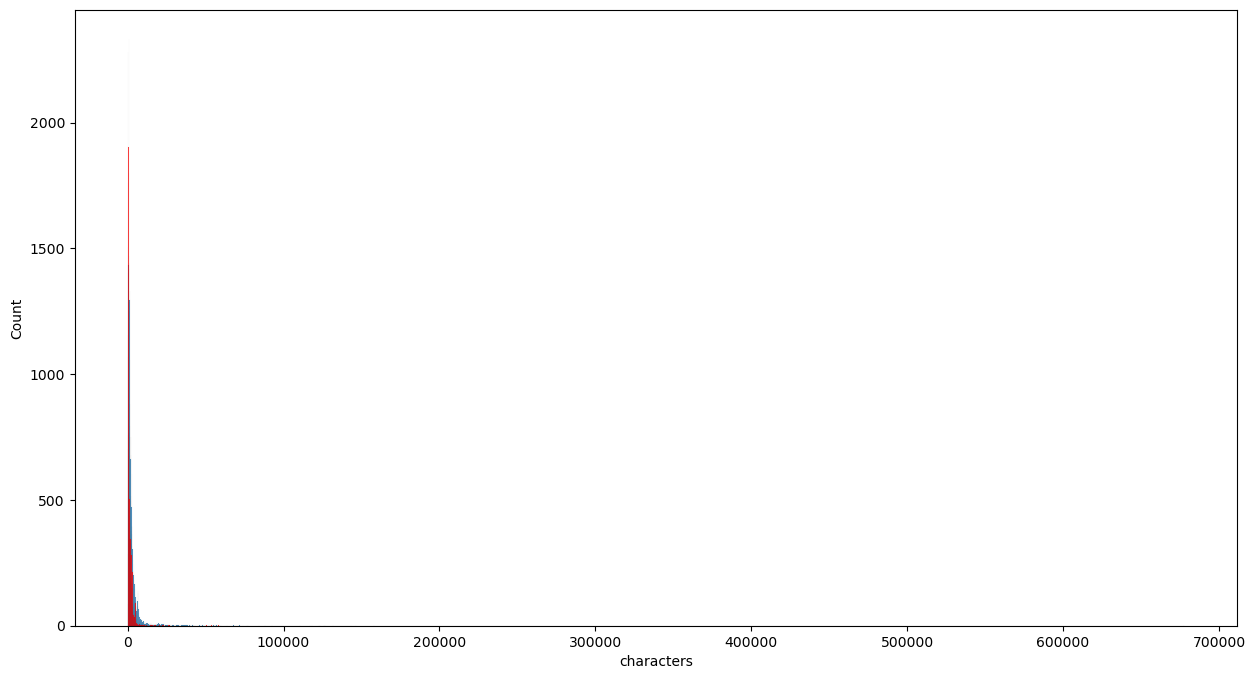

In [51]:
plt.figure(figsize=(15,8))
sns.histplot(df[df['prediction'] == 0]['characters'])
sns.histplot(df[df['prediction'] == 1]['characters'],color='red')

<Axes: xlabel='words', ylabel='Count'>

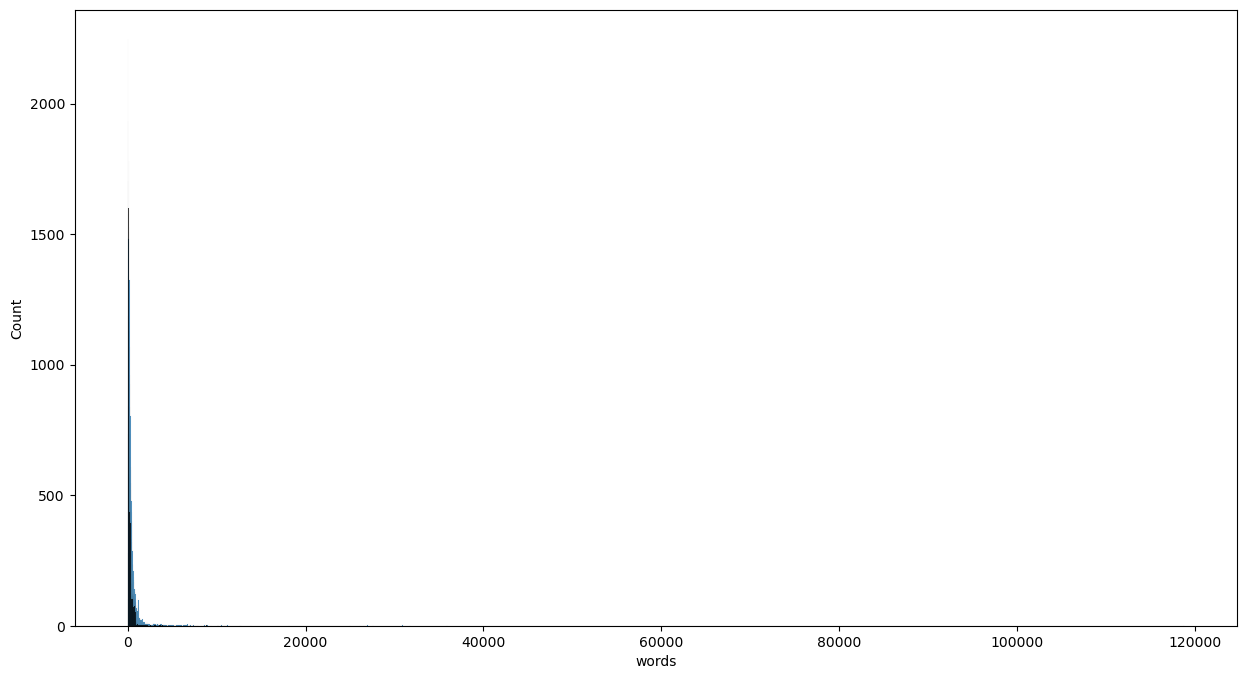

In [77]:
plt.figure(figsize=(15,8))
sns.histplot(df[df['prediction'] == 0]['words'])
sns.histplot(df[df['prediction'] == 1]['words'],color='black')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


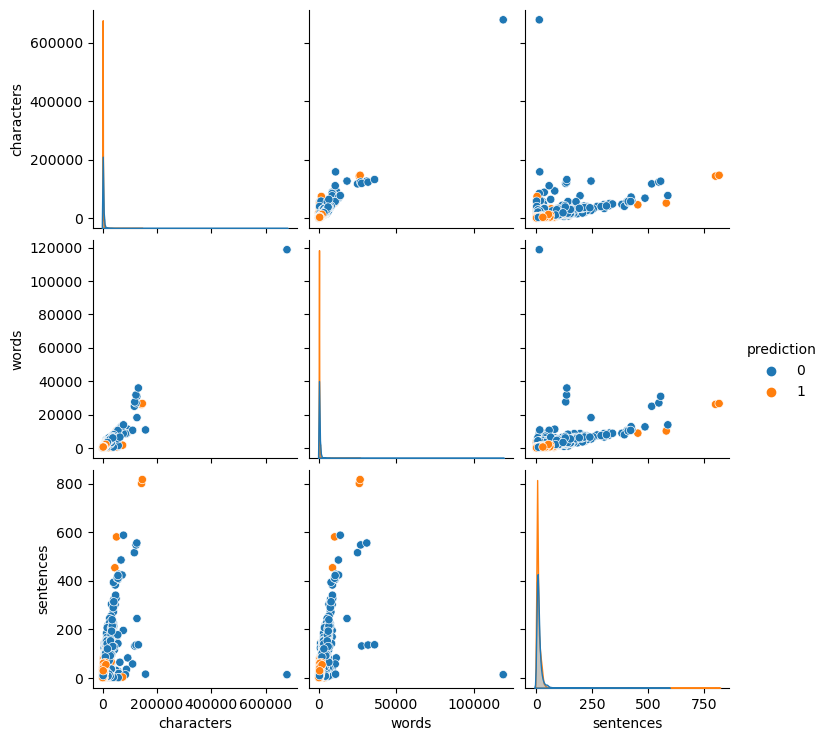

In [78]:
sns.pairplot(df,hue='prediction')

<Axes: >

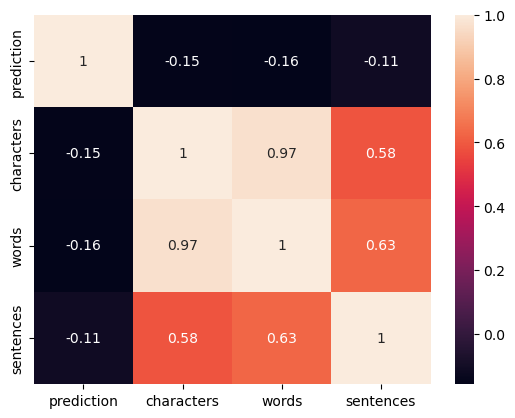

In [79]:
numeric_columns = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_columns.corr(), annot=True)


# 3. Data Preprocessing
Lower case

Tokenization

Removing special characters

Removing stop words and punctuation

Stemming

In [25]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dynamic_Computer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
import re

def detect_spam_words(text):
    words = text.split()  # Split the text into words
    
    fixed_words = []
    current_fixed_word = ""

    for word in words:
        # Check if the word contains '/' or '*'
        if '/' in word or '*' in word:
            # Remove '/' and '*' characters and append the word to the current fixed word
            current_fixed_word += re.sub(r'[/\*]', '', word)
        else:
            # If it's not a word containing '/', add the current fixed word (if any) to the list
            if current_fixed_word:
                fixed_words.append(current_fixed_word)
                current_fixed_word = ""  # Reset the current fixed word
            fixed_words.append(word)

    # Append the last current fixed word (if any) to the list
    if current_fixed_word:
        fixed_words.append(current_fixed_word)

    return ' '.join(fixed_words)

#in dataset,pal es tine
#now palestine

In [27]:
detect_spam_words("I support pal/es*tine")

'I support palestine'

In [28]:
df['detect_text'] = df['text'].apply(detect_spam_words)

In [29]:
df.head()

,prediction,text,characters,words,sentences,detect_text
0,1,Do you feel the pressure to perform and not ri...,168,40,2,Do you feel the pressure to perform and not ri...
1,0,"Hi, i've just updated from the gulus and I che...",741,116,8,"Hi, i've just updated from the gulus and I che..."
2,1,Mega authenticV I A G R A $ DISCOUNT priceC I ...,124,28,2,Mega authenticV I A G R A $ DISCOUNT priceC I ...
3,1,"Hey Billy, it was really fun going out the oth...",672,144,3,"Hey Billy, it was really fun going out the oth..."
4,1,"system"" of the home. It will have the capabili...",2545,498,29,"system"" of the home. It will have the capabili..."


In [30]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('punkt')
nltk.download('stopwords')

ps = PorterStemmer()

def transform_text(detect_text):
    if isinstance(detect_text, str):
        detect_text = detect_text.lower()
        detect_text = nltk.word_tokenize(detect_text)

        y = []
        for i in detect_text:
            if i.isalnum():
                y.append(i)

        detect_text = y[:]
        y.clear()

        for i in detect_text:
            if i not in stopwords.words('english') and i not in string.punctuation:
                y.append(i)

        detect_text = y[:]
        y.clear()

        for i in detect_text:
            y.append(ps.stem(i))

        return " ".join(y)
    else:
        return ""  # Return an empty string if 'detect_text' is not a string


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dynamic_Computer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dynamic_Computer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")


'gon na home soon want talk stuff anymor tonight k cri enough today'

In [32]:
df['text'][10]

'Anatrim =escapenumber The latest and most delighting product for weighty people=escapenumber= is now readily available =escapenumber As shown on CNN. Can you recall all the times when you asked yourself to do any thing to=escapenumber= get rid of this fastly growing pounds of fat? Happily, now no big=escapenumber= offering is expected. With Anatrim, the ground-breaking weight-reducing=escapenumber= medley, you can get healthier mode of life and become really thinner.=escapenumber= Have a look at what our customers say! "It=escapenumbers rather difficult to admit it but I was extremely addicted to=escapenumber= food. I greedily ate all this garbige and just could not stop. This fatal passion left off after I started course of taking Anatrim! God, my inclination to eat constantly vanished, mood improved and I=escapenumberm the happiest person on the planet escapenumber pounds in=escapenumber= escapenumber.escapenumber months. So, I can tell you now I=escapenumberm the happiest person!" 

In [33]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('caring')

'care'

In [34]:
df['transformed_text'] = df['detect_text'].apply(transform_text)

In [35]:
df.head()

,prediction,text,characters,words,sentences,detect_text,transformed_text
0,1,Do you feel the pressure to perform and not ri...,168,40,2,Do you feel the pressure to perform and not ri...,feel pressur perform rise occas tri v ia gr an...
1,0,"Hi, i've just updated from the gulus and I che...",741,116,8,"Hi, i've just updated from the gulus and I che...",hi updat gulu check mirror seem littl typo deb...
2,1,Mega authenticV I A G R A $ DISCOUNT priceC I ...,124,28,2,Mega authenticV I A G R A $ DISCOUNT priceC I ...,mega authenticv g r discount pricec l discount...
3,1,"Hey Billy, it was really fun going out the oth...",672,144,3,"Hey Billy, it was really fun going out the oth...",hey billi realli fun go night talk said felt i...
4,1,"system"" of the home. It will have the capabili...",2545,498,29,"system"" of the home. It will have the capabili...",system home capabl link far know within part r...


WordCloud

In [36]:
!pip install wordcloud

from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [37]:
spam_wc = wc.generate(df[df['prediction'] == 1]['transformed_text'].str.cat(sep=" "))


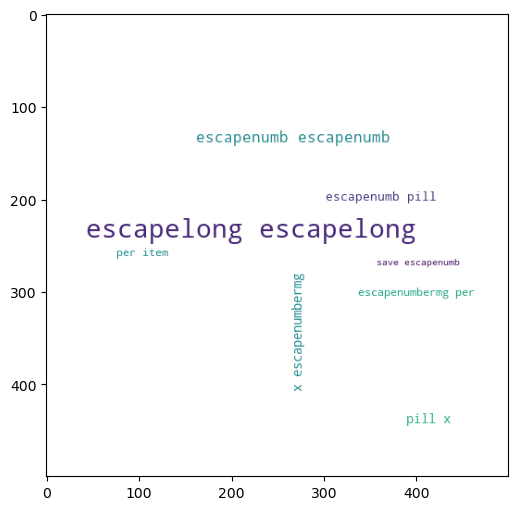

In [38]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [39]:
ham_wc = wc.generate(df[df['prediction'] == 0]['transformed_text'].str.cat(sep=" "))


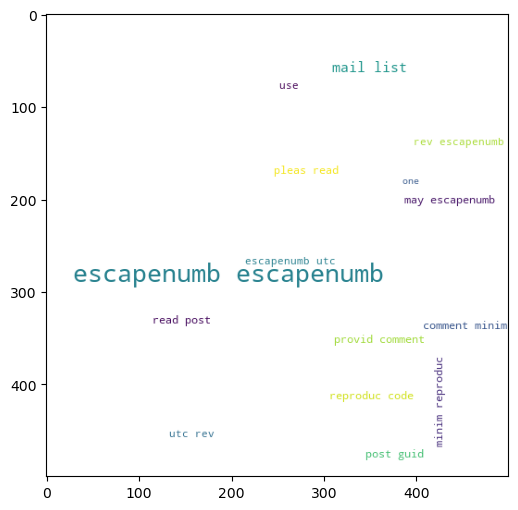

In [40]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [46]:
df.head()


,prediction,text,characters,words,sentences,detect_text,transformed_text
0,1,Do you feel the pressure to perform and not ri...,168,40,2,Do you feel the pressure to perform and not ri...,feel pressur perform rise occas tri v ia gr an...
1,0,"Hi, i've just updated from the gulus and I che...",741,116,8,"Hi, i've just updated from the gulus and I che...",hi updat gulu check mirror seem littl typo deb...
2,1,Mega authenticV I A G R A $ DISCOUNT priceC I ...,124,28,2,Mega authenticV I A G R A $ DISCOUNT priceC I ...,mega authenticv g r discount pricec l discount...
3,1,"Hey Billy, it was really fun going out the oth...",672,144,3,"Hey Billy, it was really fun going out the oth...",hey billi realli fun go night talk said felt i...
4,1,"system"" of the home. It will have the capabili...",2545,498,29,"system"" of the home. It will have the capabili...",system home capabl link far know within part r...


In [47]:
spam_corpus = []
for msg in df[df['prediction'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [48]:
len(spam_corpus)


3117454

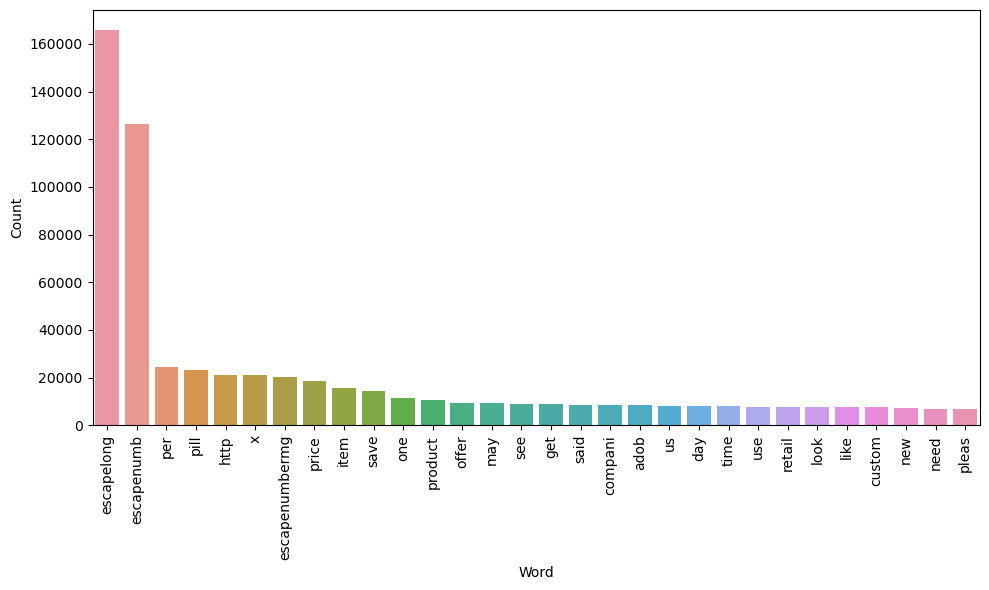

In [52]:
from collections import Counter

# Assuming spam_corpus contains the list of words as generated previously

# Create a Counter object to count word occurrences
word_counter = Counter(spam_corpus)

# Extract the 30 most common words and their counts
common_words = dict(word_counter.most_common(30))

# Create a DataFrame from the Counter object to plot
word_df = pd.DataFrame(list(common_words.items()), columns=['Word', 'Count'])

# Plotting using seaborn barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Count', data=word_df)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()


In [53]:
ham_corpus = []
for msg in df[df['prediction'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [54]:
len(ham_corpus)


4383535

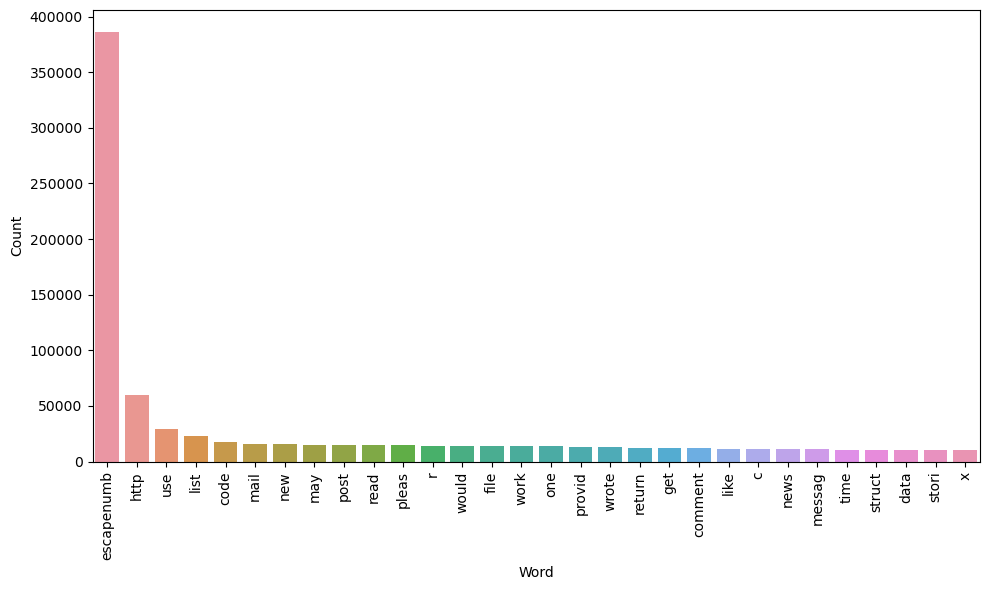

In [55]:
from collections import Counter

# Assuming ham_corpus contains the list of words

# Create a Counter object to count word occurrences in ham_corpus
word_counter = Counter(ham_corpus)

# Extract the 30 most common words and their counts
common_words = dict(word_counter.most_common(30))

# Create a DataFrame from the Counter object to plot
word_df = pd.DataFrame(list(common_words.items()), columns=['Word', 'Count'])

# Plotting using seaborn barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Count', data=word_df)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()


# Text Vectorization
# using Bag of Words


In [56]:
df.head()


,prediction,text,characters,words,sentences,detect_text,transformed_text
0,1,Do you feel the pressure to perform and not ri...,168,40,2,Do you feel the pressure to perform and not ri...,feel pressur perform rise occas tri v ia gr an...
1,0,"Hi, i've just updated from the gulus and I che...",741,116,8,"Hi, i've just updated from the gulus and I che...",hi updat gulu check mirror seem littl typo deb...
2,1,Mega authenticV I A G R A $ DISCOUNT priceC I ...,124,28,2,Mega authenticV I A G R A $ DISCOUNT priceC I ...,mega authenticv g r discount pricec l discount...
3,1,"Hey Billy, it was really fun going out the oth...",672,144,3,"Hey Billy, it was really fun going out the oth...",hey billi realli fun go night talk said felt i...
4,1,"system"" of the home. It will have the capabili...",2545,498,29,"system"" of the home. It will have the capabili...",system home capabl link far know within part r...


# 4. Model Building

In [57]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [58]:
X = tfidf.fit_transform(df['transformed_text']).toarray()


In [59]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [60]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [61]:
X.shape



(53998, 3000)

In [62]:
y = df['prediction'].values


In [63]:
from sklearn.model_selection import train_test_split


In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [65]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [66]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [67]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9580555555555555
[[4663  171]
 [ 282 5684]]
0.9707941929974381


In [68]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9477777777777778
[[4660  174]
 [ 390 5576]]
0.9697391304347827


In [69]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))


0.9316666666666666
[[4491  343]
 [ 395 5571]]
0.9420020290835306


In [70]:
# Run this cell in your Jupyter Notebook
!pip install xgboost


In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [72]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [73]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    return accuracy, precision, recall


In [75]:
train_classifier(svc,X_train,y_train,X_test,y_test)


(0.9589814814814814, 0.9641956631366616, 0.9614482065035199)

In [76]:
accuracy_scores = []
precision_scores = []
recall_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision, current_recall = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print("For ", name)  
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    print("Recall - ", current_recall)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)


For  SVC
Accuracy -  0.9589814814814814
Precision -  0.9641956631366616
Recall -  0.9614482065035199
For  KN
Accuracy -  0.865
Precision -  0.8052546045503792
Recall -  0.9966476701307408
For  NB
Accuracy -  0.9477777777777778
Precision -  0.9697391304347827
Recall -  0.9346295675494468
For  DT
Accuracy -  0.9366666666666666
Precision -  0.9176154332700822
Recall -  0.9726785115655381
For  LR
Accuracy -  0.9833333333333333
Precision -  0.978656518861681
Recall -  0.9914515588333892
For  RF
Accuracy -  0.9883333333333333
Precision -  0.9869913275517012
Recall -  0.9919544083137781
For  AdaBoost
Accuracy -  0.962037037037037
Precision -  0.9590218109715797
Recall -  0.9728461280590011
For  BgC
Accuracy -  0.9825
Precision -  0.9805356845782731
Recall -  0.9879316124706671
For  ETC
Accuracy -  0.9866666666666667
Precision -  0.9903975741239892
Recall -  0.9854173650687228
For  GBDT
Accuracy -  0.9582407407407407
Precision -  0.9471379925409438
Recall -  0.9790479383171304
For  xgb
Accurac

In [83]:
performance_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores
}).sort_values('Precision', ascending=False)


In [84]:
performance_df


,Algorithm,Accuracy,Precision,Recall
8,ETC,0.986667,0.990398,0.985417
5,RF,0.988333,0.986991,0.991954
7,BgC,0.982500,0.980536,0.987932
10,xgb,0.983519,0.978822,0.991619
4,LR,0.983333,0.978657,0.991452
2,NB,0.947778,0.969739,0.934630
0,SVC,0.958981,0.964196,0.961448
6,AdaBoost,0.962037,0.959022,0.972846
9,GBDT,0.958241,0.947138,0.979048
3,DT,0.936667,0.917615,0.972679


In [85]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")


In [86]:
performance_df1


,Algorithm,variable,value
0,ETC,Accuracy,0.986667
1,RF,Accuracy,0.988333
2,BgC,Accuracy,0.982500
3,xgb,Accuracy,0.983519
4,LR,Accuracy,0.983333
5,NB,Accuracy,0.947778
6,SVC,Accuracy,0.958981
7,AdaBoost,Accuracy,0.962037
8,GBDT,Accuracy,0.958241
9,DT,Accuracy,0.936667


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


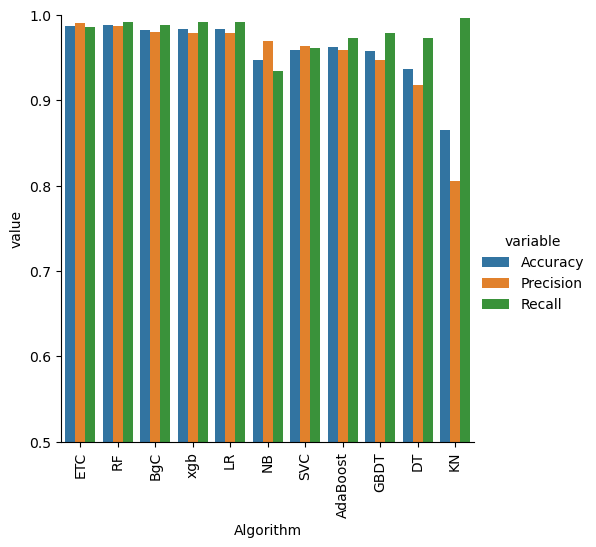

In [87]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [88]:
# Assuming performance_df1 contains columns: 'Algorithm', 'variable', 'value'
# Filter the DataFrame to get Precision and Recall values
precision_recall_df = performance_df1[performance_df1['variable'].isin(['Precision', 'Recall'])]

# Pivot the DataFrame to have Precision and Recall as separate columns
pivot_precision_recall = precision_recall_df.pivot(index='Algorithm', columns='variable', values='value').reset_index()

# Calculate F1 score
pivot_precision_recall['F1 Score'] = 2 * (pivot_precision_recall['Precision'] * pivot_precision_recall['Recall']) / (pivot_precision_recall['Precision'] + pivot_precision_recall['Recall'])

# Display the DataFrame with Precision, Recall, and F1 scores
print(pivot_precision_recall[['Algorithm', 'Precision', 'Recall', 'F1 Score']])


variable Algorithm  Precision    Recall  F1 Score
0         AdaBoost   0.959022  0.972846  0.965885
1              BgC   0.980536  0.987932  0.984220
2               DT   0.917615  0.972679  0.944345
3              ETC   0.990398  0.985417  0.987901
4             GBDT   0.947138  0.979048  0.962829
5               KN   0.805255  0.996648  0.890787
6               LR   0.978657  0.991452  0.985012
7               NB   0.969739  0.934630  0.951861
8               RF   0.986991  0.991954  0.989467
9              SVC   0.964196  0.961448  0.962820
10             xgb   0.978822  0.991619  0.985179


# Model improve
# 1. Change the max_features parameter of TfIdf


In [89]:
temp_df_max_ft_3000 = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy_max_ft_3000': accuracy_scores,
    'Precision_max_ft_3000': precision_scores,
    'Recall_max_ft_3000': recall_scores
}).sort_values('Precision_max_ft_3000', ascending=False)

In [90]:
temp_df_scaling = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy_scaling': accuracy_scores,
    'Precision_scaling': precision_scores,
    'Recall_scaling': recall_scores
}).sort_values('Precision_scaling', ascending=False)

In [91]:
temp_df_num_chars = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy_num_chars': accuracy_scores,
    'Precision_num_chars': precision_scores,
    'Recall_num_chars': recall_scores
}).sort_values('Precision_num_chars', ascending=False)

In [92]:
new_df = performance_df.merge(temp_df_max_ft_3000, on='Algorithm')


In [93]:
new_df = new_df.merge(temp_df_scaling, on='Algorithm', suffixes=('_max_ft_3000', '_scaling'))


In [94]:
new_df_scaled = new_df.merge(temp_df_num_chars, on='Algorithm')


In [95]:
print(new_df_scaled)


   Algorithm  Accuracy  Precision    Recall  Accuracy_max_ft_3000  \
0        ETC  0.986667   0.990398  0.985417              0.986667   
1         RF  0.988333   0.986991  0.991954              0.988333   
2        BgC  0.982500   0.980536  0.987932              0.982500   
3        xgb  0.983519   0.978822  0.991619              0.983519   
4         LR  0.983333   0.978657  0.991452              0.983333   
5         NB  0.947778   0.969739  0.934630              0.947778   
6        SVC  0.958981   0.964196  0.961448              0.958981   
7   AdaBoost  0.962037   0.959022  0.972846              0.962037   
8       GBDT  0.958241   0.947138  0.979048              0.958241   
9         DT  0.936667   0.917615  0.972679              0.936667   
10        KN  0.865000   0.805255  0.996648              0.865000   

    Precision_max_ft_3000  Recall_max_ft_3000  Accuracy_scaling  \
0                0.990398            0.985417          0.986667   
1                0.986991            

voting classifier

In [96]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [97]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [98]:
voting.fit(X_train,y_train)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [99]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9722222222222222
Precision 0.9826235093696764


In [100]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [101]:
from sklearn.ensemble import StackingClassifier


In [102]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)


In [103]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9881481481481481
Precision 0.9863378873708764


In [104]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))